# Assessing ERA5 reanalysis quality

Data used for this study could be biaised since it begins in 1950, when there were no satelite observations and measurement networks.

Here we try to evaluate data quality in order to exclude biaised/incorrect data.

In [19]:
from netCDF4 import Dataset

import xarray as xr

import numpy as np

import matplotlib.pyplot as plt

## Opening data

In [3]:
ds = xr.open_dataset('data/era5_z500_natl_daily_1950-2020_NEW.nc')

In [23]:
diff_norm = []

for time1, time2 in zip(ds.time.values, ds.time.values[1:]) :
    
    diff_norm.append(np.linalg.norm(ds.z.sel(time = time1) - ds.z.sel(time = time2)))

In [35]:
diff_norm_mean = np.mean(diff_norm)
diff_norm_std = np.std(diff_norm)

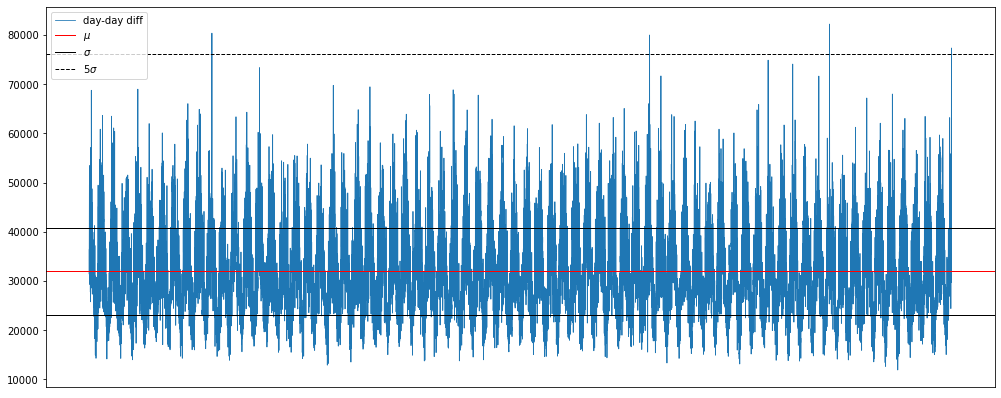

In [58]:
plt.figure(figsize = (17,7))
plt.plot(diff_norm, lw = 0.8, label = 'day-day diff')
plt.axhline(diff_norm_mean, color = 'red', lw = 1, label = '$\mu$')
plt.axhline(diff_norm_mean + diff_norm_std, color = 'k', lw = 1, label = '$\sigma$')
plt.axhline(diff_norm_mean - diff_norm_std, color = 'k', lw = 1)
plt.axhline(diff_norm_mean + 5*diff_norm_std, color = 'k', lw = 1, ls = '--', label = '$5\sigma$')
plt.legend()
plt.xticks([])
plt.show()

In [55]:
treshold = diff_norm_mean + 5*diff_norm_std

In [56]:
for time_index in np.where(np.array(diff_norm) > treshold) :
    print(ds.time.values[time_index])

['1960-02-08T18:00:00.000000000' '1996-02-20T18:00:00.000000000'
 '2010-12-14T18:00:00.000000000' '2020-12-26T18:00:00.000000000']
